In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [29]:
#Set graph color
COLOR = 'w'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [30]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)

print('Accuracy of train set : {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy of test set : {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy of train set : 0.988
Accuracy of test set : 0.951


In [31]:
from sklearn.tree import export_graphviz

In [32]:
export_graphviz(tree, out_file='tree.dot', class_names=['Malignant', 'benign'],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

In [33]:
import graphviz

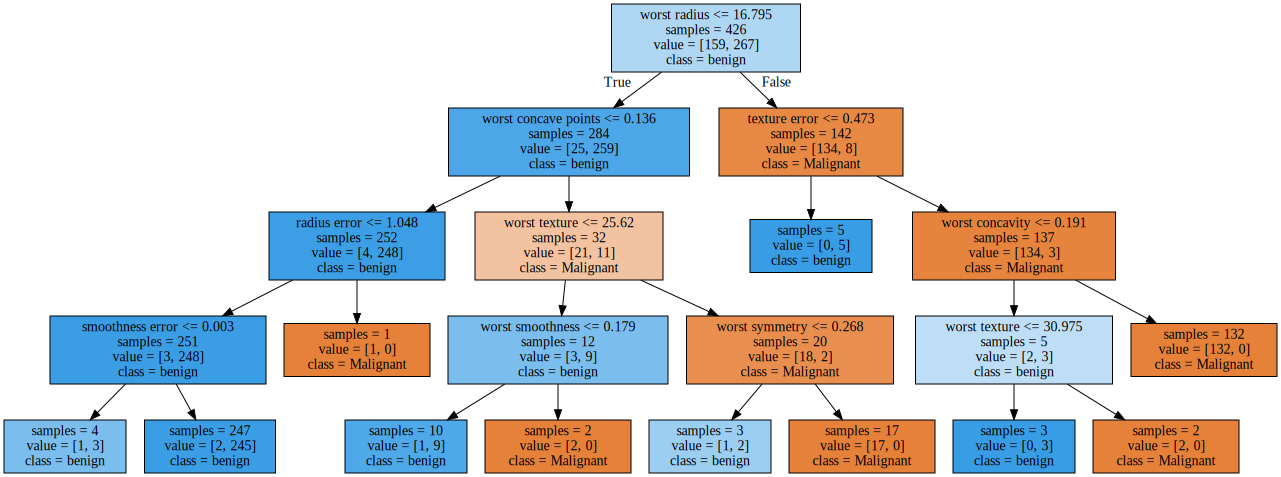

In [34]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [35]:
print("Feature importances :\n{}".format(tree.feature_importances_))

Feature importances :
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [36]:
import matplotlib.pyplot as plt
import numpy as np

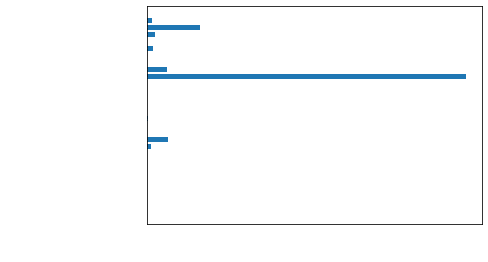

In [37]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.xticks(color='w')
    plt.yticks(np.arange(n_features), cancer.feature_names, color='w')
    plt.xlabel('Feature importances', color='w')
    plt.ylabel('Attribute', color='w')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

In [38]:
import mglearn

Feature importances: [0. 1.]


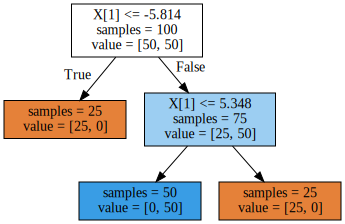

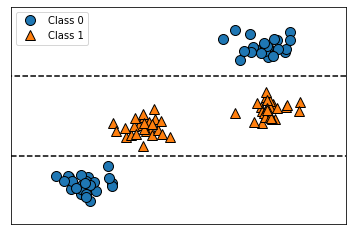

In [40]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)